In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#reading files
allSamplesDataSet = scipy.io.loadmat('/kaggle/input/allsamples/AllSamples.mat')
allSamplesData = allSamplesDataSet['AllSamples']

# print(allSamplesData.shape)
#print(allSamplesData)

In [2]:
#Strategy 1
rng = np.random.default_rng()
#function for creating random center - for strategy1
def getRandomCenter(data, k):
    #make random choice of centroids for 2-D datas 
    centroids = rng.choice(data, k, replace=False)
    #print(centroids)
    return centroids

In [3]:
#turn data to tuple
tup_allSamplesData = []
for i in range(len(allSamplesData)):
    tmp = (i, allSamplesData[i])
    tup_allSamplesData.append(tmp)
    
#function for updating centers
def updateCenters(data, assignments, k):
    #new centroids
    new_centers = np.zeros((k, data.shape[1]))
    counts = np.zeros(k)
    for i, centerIndex in assignments.items():
        new_centers[centerIndex] += data[i]
        counts[centerIndex] += 1
    #calculate mean
    for j in range(k):
        if counts[j] != 0:
            new_centers[j] /= counts[j]
    return new_centers

In [4]:
#function to calculate k_means algorithm
def k_means(data, k, max_iters=100, strategy=1, tolerance =1e-4):
    
    #step1: get random centroids
    if  strategy == 1:
        centers = getRandomCenter(data, k)
    else:
        centers = getRandomCenter2(data, k)
    
    for _ in range(max_iters):
        #get distanceMatrix = {index of data in allSamplesData : [dist to center1, dist to center2, ..... , dist to centerK]}
        distanceMatrix = {}
        for i, p in tup_allSamplesData:
            tmp_distance = []
            for center in centers:
                Euclidean_dist = np.linalg.norm(p - center)
                tmp_distance.append(Euclidean_dist)
            if i not in distanceMatrix:
                distanceMatrix[i] = []
            distanceMatrix[i].append(tmp_distance)
            
        #step2: assign data points to nearest center
        assignments = {}
        for i, dist in distanceMatrix.items():
            nearest_center_index = np.argmin(dist)
            assignments[i] = nearest_center_index
        #print(data)
        
        #step3: update centroids
        new_centers = updateCenters(data,assignments,k)

        #step4: check if converge
        if np.all(np.linalg.norm(new_centers - centers, axis=1) < tolerance):
            break

        centers = new_centers
        
    #calculating to get objective value
    distanceM = []
    for i, p in tup_allSamplesData:
        index = assignments[i]
        distance = np.sum((p - centers[index])**2)
        distanceM.append(distance)
    objective = sum(distanceM)
    return centers, objective

    k  Objective Function Value
0   2               2984.243793
1   3               1758.865390
2   4               1108.119208
3   5               1178.126819
4   6               1366.467805
5   7                718.096508
6   8                652.048270
7   9                395.949210
8  10                324.314365


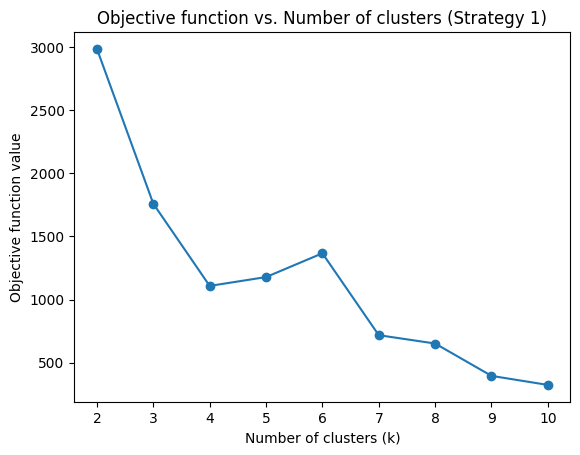

In [5]:
objectives = []
for k in range(2, 11):
    centers, objective = k_means(allSamplesData, k,1)
    objectives.append(objective)

#print(objectives)

#print the plot 
k_values = range(2, 11)
df = pd.DataFrame({
    'k': range(2, 11),
    'Objective Function Value': objectives
})
print(df)
plt.plot(k_values, objectives, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Objective function value')
plt.title('Objective function vs. Number of clusters (Strategy 1)')
plt.show()

In [6]:
#Strategy 2
#function for creating random center - for strategy2
def getRandomCenter2(data, k):
    centroids = [rng.choice(allSamplesData, 1, replace=False)]
    for _ in range(1, k):
        dist = np.array([min([np.linalg.norm(x - c) for c in centroids]) for x in data])
        new_center = data[np.argmax(dist)]
        centroids.append(new_center)
    return centroids

    k  Objective Function Value
0   2               1979.945839
1   3               2309.335653
2   4               1169.872059
3   5               1172.376806
4   6                674.199379
5   7                702.868328
6   8                520.433228
7   9                443.997465
8  10                302.798633


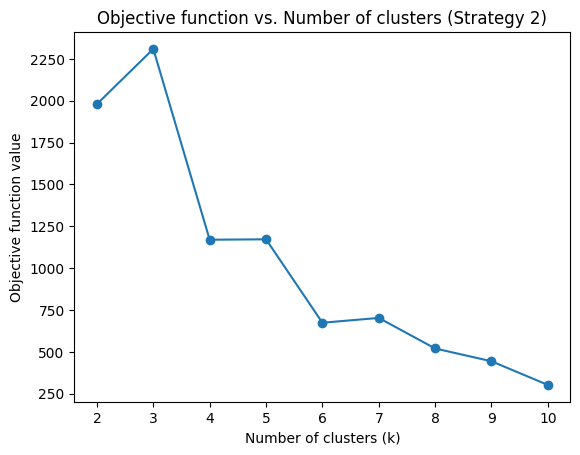

In [7]:
objectives = []
for k in range(2, 11):
    centers, objective = k_means(allSamplesData, k,2)
    objectives.append(objective)

k_values = range(2, 11)
df = pd.DataFrame({
    'k': range(2, 11),
    'Objective Function Value': objectives
})
print(df)
plt.plot(k_values, objectives, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Objective function value')
plt.title('Objective function vs. Number of clusters (Strategy 2)')
plt.show()